<a href="https://colab.research.google.com/github/hgabrali/Machine-Learning/blob/main/titanic_data_processing_classification_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Construct a downloadable link
dwn_url = f"https://drive.google.com/uc?export=download&id=1mB59W8xns79dpP50HeAAOyoyiauh1US2"

# Read directly into pandas
df = pd.read_csv(dwn_url)

# Check first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Null values

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_dropped = df.dropna(subset=["Embarked"])
df_dropped["Embarked"].isnull().sum()

np.int64(0)

In [ ]:
df_dropped.loc[:, "Age"] = df_dropped["Age"].fillna(df_dropped["Age"].median()) # Replace
df_dropped["Age"].isnull().sum() # Check again

np.int64(0)

In [ ]:
df_dropped = df_dropped.drop(columns=["Cabin"]) #Drop the column
df_dropped.isnull().sum() #Check

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Outliers

<Axes: xlabel='Fare'>

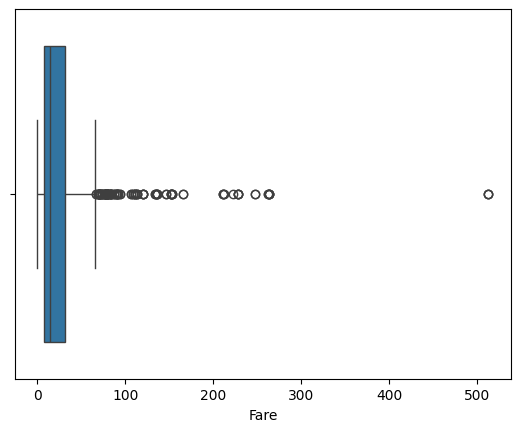

In [ ]:
import seaborn as sns

sns.boxplot(x=df_dropped["Fare"])

In [ ]:
Q1 = df_dropped["Fare"].quantile(0.25)
Q3 = df_dropped["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_dropped[(df_dropped["Fare"] < lower_bound) | (df_dropped["Fare"] > upper_bound)]
print(f"Number of outliers in Fare: {len(outliers)}")


Number of outliers in Fare: 114


In [ ]:
# Removing outliers
df_removed = df_dropped[(df["Fare"] >= lower_bound) & (df_dropped["Fare"] <= upper_bound)]
df_removed.shape

/tmp/ipython-input-3034787004.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_removed = df_dropped[(df["Fare"] >= lower_bound) & (df_dropped["Fare"] <= upper_bound)]


(775, 11)

<Axes: xlabel='Fare'>

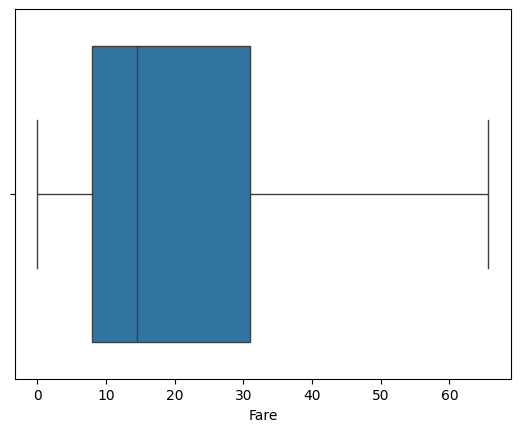

In [ ]:
# Caping outliers
df_capped = df_dropped.copy()
df_capped["Fare"] = df_capped["Fare"].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(x=df_capped["Fare"])


<Axes: xlabel='Fare', ylabel='Count'>

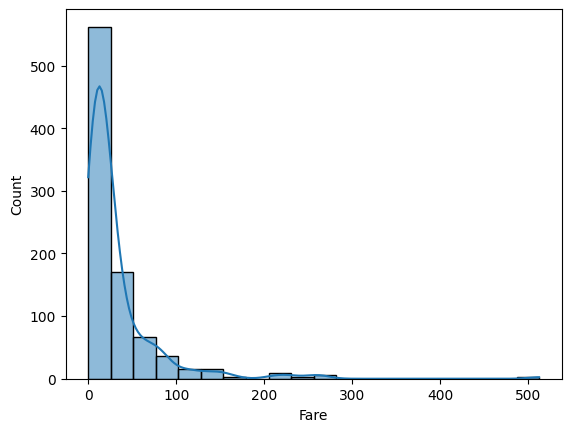

In [ ]:
sns.histplot(df_dropped["Fare"], bins=20, kde=True)

<Axes: xlabel='LogFare', ylabel='Count'>

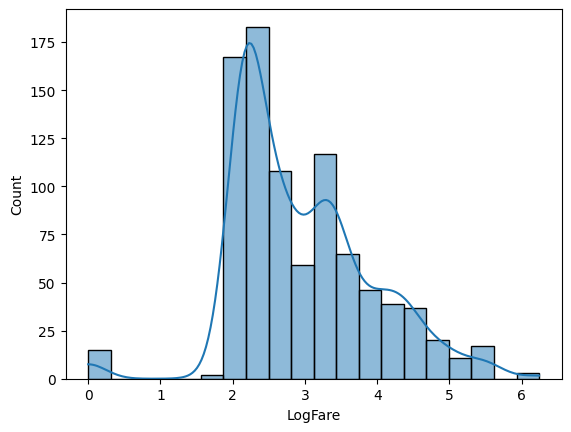

In [ ]:
import numpy as np

df_dropped["LogFare"] = np.log1p(df_dropped["Fare"])  # safer than log(Fare)
sns.histplot(df_dropped["LogFare"], bins=20, kde=True)

# Categorical variables

In [ ]:
df_dropped["Sex"].value_counts()

,count
Sex,
male,577
female,312


In [ ]:
df_dropped["Sex"] = df_dropped["Sex"].map({"male": 0, "female": 1})
df_dropped["Sex"].value_counts()

,count
Sex,
0,577
1,312


In [ ]:
df_dropped["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
pd.get_dummies(df_dropped, columns=["Embarked"], drop_first=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,LogFare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.110213,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,4.280593,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.188856,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3.990834,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.202765,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,2.639057,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,3.433987,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,3.196630,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,3.433987,False,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select the column
embarked = df_dropped[["Embarked"]]

# Initialize encoder
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Fit and transform
embarked_encoded = encoder.fit_transform(embarked)

# Create dataframe with encoded columns
embarked_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(["Embarked"]))

# Concatenate back with original dataframe
df_encoded = pd.concat([df_dropped.reset_index(drop=True), embarked_df], axis=1)

df_encoded[encoder.get_feature_names_out(["Embarked"])].head()


,Embarked_Q,Embarked_S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


# Feature Scaling

In [ ]:
df_dropped[["Age", "Fare"]].describe()

,Age,Fare
count,889.000000,889.000000
mean,29.315152,32.096681
std,12.984932,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = df_dropped.copy()
df_minmax[["Age", "Fare"]] = scaler.fit_transform(df_minmax[["Age", "Fare"]])
df_minmax[["Age", "Fare"]].describe()

,Age,Fare
count,889.000000,889.000000
mean,0.363096,0.062649
std,0.163168,0.097003
min,0.000000,0.000000
25%,0.271174,0.015412
50%,0.346569,0.028213
75%,0.434531,0.060508
max,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standard = df_dropped.copy()
df_standard[["Age", "Fare"]] = scaler.fit_transform(df_standard[["Age", "Fare"]])
df_standard[["Age", "Fare"]].describe().round(2)

,Age,Fare
count,889.00,889.00
mean,0.00,0.00
std,1.00,1.00
min,-2.23,-0.65
25%,-0.56,-0.49
50%,-0.10,-0.36
75%,0.44,-0.02
max,3.91,9.67


# Feature Engineering

In [ ]:
df_dropped[["SibSp", "Parch"]].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [ ]:
df_dropped["FamilySize"] = df_dropped["SibSp"] + df_dropped["Parch"] + 1

df_dropped[["SibSp", "Parch", "FamilySize"]].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [ ]:
# Lets see which range of values Age takes
df_dropped["Age"].describe()

,Age
count,889.000000
mean,29.315152
std,12.984932
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [ ]:
bins = [0, 12, 18, 35, 60, 100]
labels = ["Child", "Teen", "Adult", "MiddleAge", "Senior"]

df_dropped["AgeGroup"] = pd.cut(df_dropped["Age"], bins=bins, labels=labels, right=False)

df_dropped[["Age", "AgeGroup"]].head(10)

,Age,AgeGroup
0,22.0,Adult
1,38.0,MiddleAge
2,26.0,Adult
3,35.0,MiddleAge
4,35.0,MiddleAge
5,28.0,Adult
6,54.0,MiddleAge
7,2.0,Child
8,27.0,Adult
9,14.0,Teen


In [ ]:
df_dropped["Name"].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [ ]:
df_dropped["Title"] = df_dropped["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

df_dropped["Title"].value_counts().head()

,count
Title,
Mr,517
Miss,181
Mrs,124
Master,40
Dr,7


# Logistic Regression

## Step 0: Check the dataset

In [ ]:
df_dropped.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LogFare,FamilySize,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2.110213,2,Adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,4.280593,2,MiddleAge,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856,1,Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,3.990834,2,MiddleAge,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,2.202765,1,MiddleAge,Mr


**⚠️ Issues we see**

Embarked, AgeGroup, and Title are important features, but they’re still text.

ML models can’t use raw strings, so we must encode them and update df_dropped.

**✅ What we need to do**

Embarked → One-hot encode
Create numeric columns for each port and add them to the dataframe.

AgeGroup → Ordinal/label encode
Map the ordered groups to integers (e.g., Child < Teen < Adult < MiddleAge < Senior).

Title → One-hot encode (after grouping rare titles)
Title is nominal (no natural order). First merge rare titles into "Other", then one-hot encode.

In [ ]:
# -----------------------------
# 1) AgeGroup → ordinal encoding
# -----------------------------
agegroup_mapping = {"Child": 0, "Teen": 1, "Adult": 2, "MiddleAge": 3, "Senior": 4}
df_dropped["AgeGroup_num"] = df_dropped["AgeGroup"].map(agegroup_mapping).astype("Int64")
df_dropped.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LogFare,FamilySize,AgeGroup,Title,AgeGroup_num
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2.110213,2,Adult,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,4.280593,2,MiddleAge,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856,1,Adult,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,3.990834,2,MiddleAge,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,2.202765,1,MiddleAge,Mr,3


In [ ]:
df_dropped.Title.value_counts()

,count
Title,
Mr,517
Miss,181
Mrs,124
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [ ]:
# -----------------------------
# 2) Title → group rare + one-hot encode
# -----------------------------
# Normalize a few aliases
df_dropped["Title"] = df_dropped["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})

# Group rare titles into "Other"
title_counts = df_dropped["Title"].value_counts()
rare_titles = title_counts[title_counts < 10].index
df_dropped["Title"] = df_dropped["Title"].replace(rare_titles, "Other")
df_dropped.Title.value_counts()

,count
Title,
Mr,517
Miss,184
Mrs,125
Master,40
Other,23


In [ ]:

# -----------------------------
# 3) Embarked + Title → OneHotEncoder
# -----------------------------
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Columns we want to encode
to_encode = df_dropped[["Embarked", "Title"]]

# Fit + transform
encoded = encoder.fit_transform(to_encode)

# Put back as DataFrame with new col names
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Embarked", "Title"]), index=df_dropped.index)

# Concatenate
df_dropped = pd.concat([df_dropped, encoded_df], axis=1)

# -----------------------------
# Quick check
# -----------------------------
df_dropped.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,AgeGroup,Title,AgeGroup_num,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,2,Adult,Mr,2,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,2,MiddleAge,Mrs,3,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,Adult,Miss,2,0.0,1.0,1.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,2,MiddleAge,Mrs,3,0.0,1.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,MiddleAge,Mr,3,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Drop columns that are not useful or that we replaced with engineered versions
# To keep the previous df, lets call this one df_lr (logistic regression)
df_lr = df_dropped.drop(columns=[
    "PassengerId",     # ID, no predictive value
    "Name",            # Text field
    "Ticket",          # Mostly random identifiers
    "Fare",            # Dropped to avoid correlation with Pclass
    "Embarked",        # Will use one-hot encoded version
    "Age","AgeGroup",  # Replaced by AgeGroup_num
    "SibSp", "Parch",  # Replaced by FamilySize
    "Title"            # Replaced by one-hot encoding
])

# Quick check
df_lr.head()

,Survived,Pclass,Sex,LogFare,FamilySize,AgeGroup_num,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,0,2.110213,2,2,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,1,4.280593,2,3,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,1,2.188856,1,2,0.0,1.0,1.0,0.0,0.0,0.0
3,1,1,1,3.990834,2,3,0.0,1.0,0.0,0.0,1.0,0.0
4,0,3,0,2.202765,1,3,0.0,1.0,0.0,1.0,0.0,0.0


## Step 1

In [ ]:
# Features: all but the target
X = df_lr.drop(columns=["Survived"])

# Target column
y = df_lr["Survived"]

# Quick check
X.head()

,Pclass,Sex,LogFare,FamilySize,AgeGroup_num,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,0,2.110213,2,2,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,4.280593,2,3,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,2.188856,1,2,0.0,1.0,1.0,0.0,0.0,0.0
3,1,1,3.990834,2,3,0.0,1.0,0.0,0.0,1.0,0.0
4,3,0,2.202765,1,3,0.0,1.0,0.0,1.0,0.0,0.0


## Step 2

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (711, 11)
Test size: (178, 11)


## Step 3

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42) #max_iter=1000 just ensures the model has enough iterations to converge.

In [ ]:
model

LogisticRegression(max_iter=1000, random_state=42)

## Step 4

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
print(model.coef_)

[[-0.77349027  0.85350967  0.42414388 -0.45197942 -0.45304645  0.25033175
  -0.23879833 -0.20697405 -2.22349928  0.26551245 -1.40121963]]


In [ ]:
print(model.intercept_)

[2.84349276]


## Step 5

In [ ]:
y_pred = model.predict(X_test)
print(y_pred[:10])

[0 0 0 0 0 1 0 1 1 0]


In [ ]:
y_proba = model.predict_proba(X_test)
print(y_proba[:10])


[[0.95249257 0.04750743]
 [0.86855325 0.13144675]
 [0.86855325 0.13144675]
 [0.91461563 0.08538437]
 [0.94445964 0.05554036]
 [0.05720529 0.94279471]
 [0.91546236 0.08453764]
 [0.05699926 0.94300074]
 [0.10660203 0.89339797]
 [0.91469332 0.08530668]]


In [ ]:
import pandas as pd

# Compare in one DataFrame
results = pd.DataFrame({
    "Actual": y_test.values,     # real survival (0/1)
    "Predicted": y_pred,         # predicted class (0/1)
    "Prob_Survived": y_proba[:, 1]     # predicted probability of survival
})

results.head(10)


,Actual,Predicted,Prob_Survived
0,0,0,0.047507
1,0,0,0.131447
2,0,0,0.131447
3,0,0,0.085384
4,0,0,0.055540
5,0,1,0.942795
6,0,0,0.084538
7,1,1,0.943001
8,1,1,0.893398
9,1,0,0.085307


**How to read this**

Actual → what really happened.

Predicted → the model’s yes/no decision (based on threshold).

Prob_Survived → the underlying probability the model used to decide.

**This is super useful to:**

Spot cases where the model was confident (probabilities close to 0 or 1).

Spot borderline cases (probabilities around 0.5).

### Toggle the threshold (0.5 → 0.3 → 0.7) and compare

Instead of using the default threshold of 0.5, we manually set it to 0.3.

This means the model is now more likely to predict survival (because it only needs 30% confidence instead of 50%).

Lowering the threshold = catch more survivors (higher recall), but also increases false positives (predicting survival when they didn’t).

Raising the threshold = be stricter, fewer false alarms, but also miss more survivors.

In [ ]:
# Get probabilities for class 1
y_prob = model.predict_proba(X_test)[:, 1]

# Manually apply your threshold
threshold = 0.3
y_pred_custom = (y_prob >= threshold).astype(int)

## Step 6

In [ ]:
from sklearn.metrics import accuracy_score

# Compare true values (y_test) vs predicted values (y_pred)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.8146067415730337


# Evaluation metrics

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cm

array([[47, 21],
       [12, 98]])

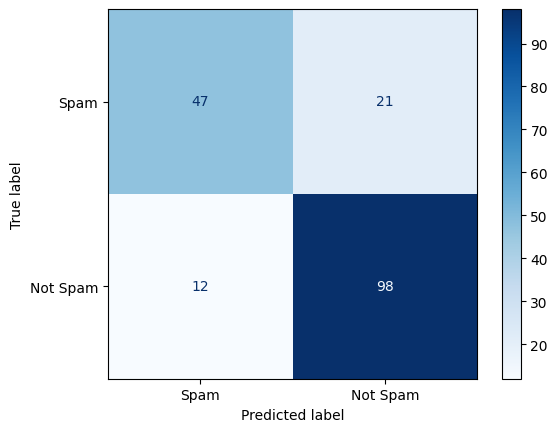

In [ ]:
# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Spam", "Not Spam"])
disp.plot(cmap="Blues")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Accuracy:", acc)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.8146067415730337
Precision: 0.80
Recall: 0.69
F1 Score: 0.74


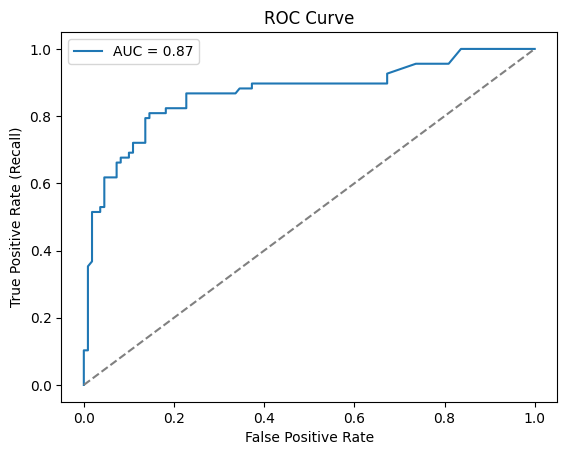

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Example: y_test are true labels, y_proba are predicted probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
auc = roc_auc_score(y_test, y_proba[:, 1])

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray") # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit - training the model
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Printing evaluation metrics
print("Accuracy:", acc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8258426966292135
Confusion Matrix:
 [[97 13]
 [18 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.74      0.76        68

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178



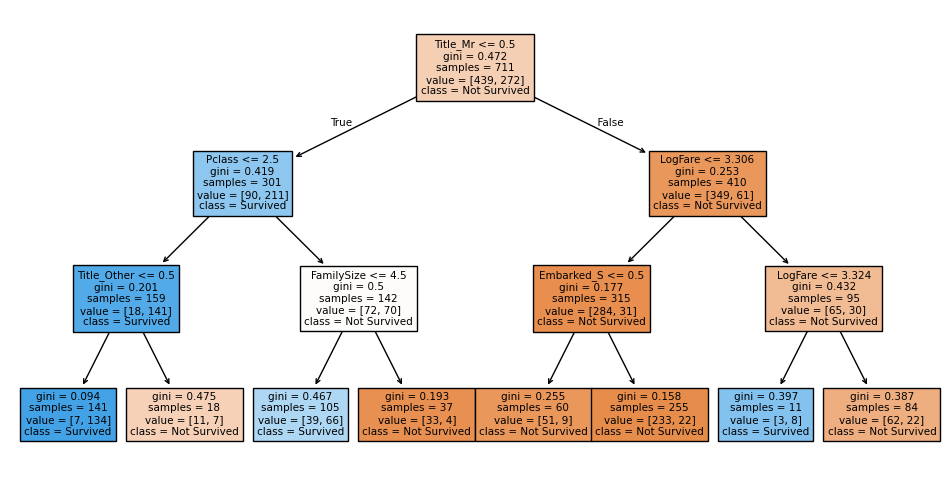

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Plot the trained tree
plt.figure(figsize=(12, 6))
plot_tree(
    dt_model,                                # ✅ trained model, not the module
    feature_names=X_train.columns,
    class_names=["Not Survived", "Survived"],
    filled=True
)
plt.show()

In [ ]:
# After fitting a tree
importances = dt_model.feature_importances_

# Show as DataFrame
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importances)

         Feature  Importance
8       Title_Mr    0.639558
0         Pclass    0.140581
3     FamilySize    0.089550
2        LogFare    0.067125
10   Title_Other    0.060803
6     Embarked_S    0.002383
1            Sex    0.000000
5     Embarked_Q    0.000000
4   AgeGroup_num    0.000000
7     Title_Miss    0.000000
9      Title_Mrs    0.000000


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train (fit) the model
rf.fit(X_train, y_train)

# 3. Predict
y_pred = rf.predict(X_test)

# 4. Evaluate
class_report_rf = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)
print("Classification Report:\n", class_report_rf)


Accuracy: 0.7640449438202247
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       110
           1       0.71      0.65      0.68        68

    accuracy                           0.76       178
   macro avg       0.75      0.74      0.75       178
weighted avg       0.76      0.76      0.76       178



In [ ]:
# Get feature importances
importances = rf.feature_importances_

# Put into DataFrame for readability
feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp)

         Feature  Importance
2        LogFare    0.349115
8       Title_Mr    0.160144
1            Sex    0.109452
3     FamilySize    0.100013
0         Pclass    0.090166
7     Title_Miss    0.056782
4   AgeGroup_num    0.054992
9      Title_Mrs    0.033794
6     Embarked_S    0.024467
5     Embarked_Q    0.012668
10   Title_Other    0.008407


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
svm = SVC(kernel="linear", probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8146067415730337

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        68

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Train KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8033707865168539
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

